In [21]:
from typing import Dict
from itertools import combinations
import pathlib
import json

import numpy as np
import xarray as xr
from scipy import stats as ss
from matplotlib import pyplot as plt

from pysqkit import Qubit
from pysqkit.qubits import Fluxonium
from pysqkit.util.phys import temperature_to_thermalenergy

from layouts import Layout
from layouts.library import surface_code
from layouts.util.mixed import set_freq_groups, set_transmon_target_freqs

In [24]:
def extract_freqs(
    qubit: Qubit, 
) -> Dict[str, float]:
    """
    Description
    --------------------------------------------------------------
    Returns the transition frequencies of a given qubit.
    """
    
    num_levels = qubit.dim_hilbert
    
    results = {}
    
    states = [qubit.state(str(level)) for level in range(num_levels)]
        
    for level_i, level_j in combinations(range(num_levels), 2):
        freq_i = states[level_i][0]
        freq_j = states[level_j][0]
        results[f"freq_{level_i}{level_j}"] = freq_j - freq_i

    return results

In [2]:
NOTEBOOK_DIR = pathlib.Path.cwd()

DATA_FOLDER = NOTEBOOK_DIR / "data"
DATA_FOLDER.mkdir(parents=True, exist_ok=True)

In [17]:
with open(NOTEBOOK_DIR.parent / "flx_transm_params.txt") as param_file:
    PARAM_SETS = json.load(param_file)
    
set_ind = "2"
PARAM_SET = PARAM_SETS[set_ind]

In [22]:
TEMPERATURE = 0.020
THERMAL_ENERGY = temperature_to_thermalenergy(TEMPERATURE)
FLUXONIUM_LEVELS = 6

fluxonium = qubits.Fluxonium(
    label = 'fluxonium', 
    charge_energy = PARAM_SET["charge_energy_f"], 
    induct_energy = PARAM_SET["induct_energy_f"], 
    joseph_energy = PARAM_SET["joseph_energy_f"], 
    diel_loss_tan = PARAM_SET["diel_loss_tan_f"],
    env_thermal_energy = THERMAL_ENERGY,
)
fluxonium.diagonalize_basis(FLUXONIUM_LEVELS)

fluxonium_freqs = extract_freqs(fluxonium)

In [6]:
DISTANCE = 3

layout = surface_code(DISTANCE, mixed_layout=True)
set_freq_groups(layout)

GROUP_FREQS = np.array([4.3, 4.7, 5.3, 5.7]) # Following IBM definitions
GROUP_ANHARMS = np.repeat(-0.3, len(GROUP_FREQS))

set_transmon_target_freqs(layout, GROUP_FREQS, GROUP_ANHARMS)

BOUNDS =  [0.100, 0.060, 0.030, 0.020, 0.030, 0.060]

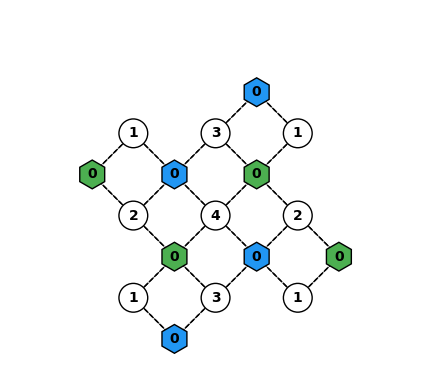

In [7]:
fig, ax = plt.subplots(dpi=100)
layout.plot(param_label="freq_group", axis=ax)
plt.tight_layout()
plt.show()

In [43]:
res_var = 1e-2
freq_var = res_var / 2

target_freq = 5.3

target_std = ss.norm(target_freq, target_freq * freq_var)

In [28]:
MIN_RES_VAR = 1e-3
MAX_RES_VAR = 1e-1
NUM_RES_VARS = 20

RES_VARS = np.geomspace(MIN_RES_VAR, MAX_RES_VAR, NUM_RES_VARS)

n_anc = 4
n_pairs = 2

results = []
for res_var in RES_VARS:
    freq_var = 0.5*res_var
    target_std = target_freq * freq_var
    spec_std = spec_freq * freq_var
    
    combined_mean = target_freq + spec_freq - control_04_freq
    combined_std = np.sqrt(target_std**2 + spec_std**2)
    
    dist = ss.norm(combined_mean, combined_std)
    
    
    results.append((1 - dist.cdf(0))**(n_anc*n_pairs))

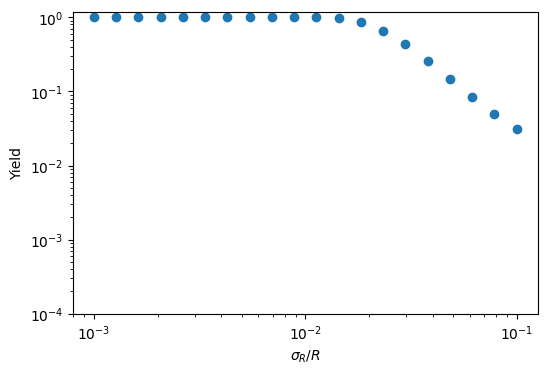

In [30]:
fig, ax = plt.subplots(dpi=100)


ax.scatter(
    RES_VARS, 
    results,
)
    
ax.set_xscale("log")
ax.set_xlabel(r"$\sigma_{R}/R$")
ax.set_ylabel(r"Yield")
ax.set_yscale("log")
ax.set_ylim(1e-4)
#ax.set_xlim(1e-3, 1e-1)

plt.show()

In [ ]:
res_var = 1e-2
freq_var = 0.5*res_var

control_04_freq = 9.864473236189298
target_freq = 5.3
spec_freq = 4.7

target_std = target_freq * freq_var
spec_std = spec_freq * freq_var

combined_mean = target_freq + spec_freq - control_04_freq
combined_std = np.sqrt(target_std**2 + spec_std**2)

dist = ss.norm(combined_mean, combined_std)

In [38]:
fluxonium_freqs["freq_12"]

3.388586558452083

In [39]:
fluxonium_freqs["freq_05"]/3

4.409695772147802

In [40]:
fluxonium_freqs["freq_04"]/2

4.932236618094649

In [41]:
fluxonium_freqs["freq_15"]/2

6.323619160022987

In [42]:
fluxonium_freqs["freq_03"]

6.574488472163304

In [77]:
sqrt(pi/2)

1.2533141373155001

In [149]:
from math import erf, sqrt, pi, inf
import numpy as np

In [152]:
def model_func(x):
    return sqrt(pi/2) * (erf(x/sqrt(2)) + 1)

def other_model_func(x):
    return (erf(x/sqrt(2)) + 1) / 2

In [160]:
delta_f = 13.96
sigma_f = np.linspace(4, 60, 22)
num_qubits = 17

In [161]:
x_arr = delta_f/sigma_f

In [162]:
yield_pred = [other_model_func(x)**num_qubits for x in x_arr]

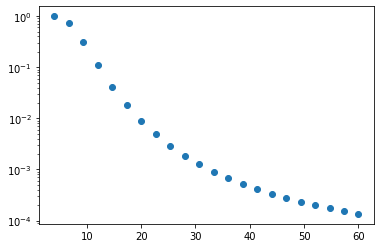

In [164]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter(sigma_f, yield_pred)
ax.set_yscale("log")
plt.show()